In [26]:
import json
import matplotlib.pyplot as plt

In [27]:
def GetData(file):
    '''
    Parses the data in a `.json` file produced by the Unity simulation into an array for each body

    Returns:
        `timeValues`: Array of time values

        `celestialBodies`: Dictionary of arrays for each celestial body

        `lagrangePoints`: Dictionary of arrays for each lagrange point
    '''
    raw = json.load(file)

    timeValues = []
    celestialBodies = {}
    lagrangePoints = {}
    for entry in raw:
        timeValues.append(entry['time'])
        celestialBodyRaw = entry['celestialBodyData']
        for cb in celestialBodyRaw:
            name = cb['name']
            if (name not in celestialBodies):
                celestialBodies[name] = []
            celestialBodies[name].append(cb)

        lagrangePointRaw = entry['lagrangePointData']
        for lp in lagrangePointRaw:
            name = lp['name']
            if (name not in lagrangePoints):
                lagrangePoints[name] = []
            lagrangePoints[name].append(lp)

    return timeValues, celestialBodies, lagrangePoints

In [28]:
def GetPositions(arrayOfDictsWithPos):
    '''
    Creates a dictionary of the positions of a celestial body or lagrange point through time
    '''
    positions = {
        'x' : [e['position']['x'] for e in arrayOfDictsWithPos],
        'y' : [e['position']['y'] for e in arrayOfDictsWithPos],
        'z' : [e['position']['z'] for e in arrayOfDictsWithPos]
    }
    return positions

In [29]:
def TranslateAllPositions(positionsDict, translations):
    '''
    Translates the positions in positionsDict by subtracting the positions in translations
    '''
    translatedPositions = {
        'x': [],
        'y': [],
        'z': []
    }
    for i in range(len(positionsDict['x'])):
        translatedPositions['x'].append(positionsDict['x'][i] - translations['x'][i])
        translatedPositions['y'].append(positionsDict['y'][i] - translations['y'][i])
        translatedPositions['z'].append(positionsDict['z'][i] - translations['z'][i])

    return translatedPositions

In [36]:
def PlotPositions(positions, label):
    plt.plot(positions['x'], positions['z'], label=label)

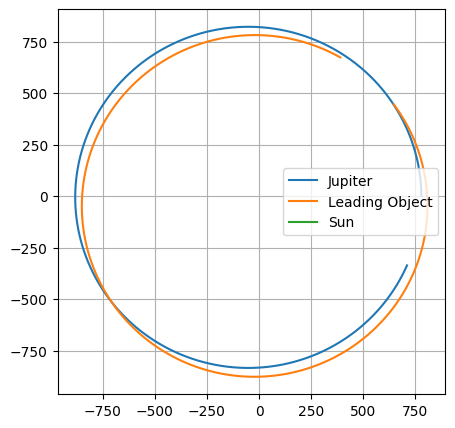

In [34]:
f = open('Data/Basic_Setup.json')
timeValues, celestialBodies, lagrangePoints = GetData(f)
f.close()

# Get positions
jupiterPos = GetPositions(celestialBodies['Jupiter'])
leadingObjectPos = GetPositions(celestialBodies['Leading Object'])
sunPos = GetPositions(celestialBodies['Sun'])

# Normalize all positions around the Sun
jupiterPos = TranslateAllPositions(jupiterPos, sunPos)
leadingObjectPos = TranslateAllPositions(leadingObjectPos, sunPos)
sunPos = TranslateAllPositions(sunPos, sunPos)

fig = plt.figure(figsize=(5,5))
PlotPositions(jupiterPos, 'Jupiter')
PlotPositions(leadingObjectPos, 'Leading Object')
PlotPositions(sunPos, 'Sun')

plt.grid()
plt.legend()